In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')
datapath=('/content/drive/MyDrive/dataset/SpotifyFeatures.csv')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv(datapath)
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
genre_encoded = pd.get_dummies(data['genre'], prefix='genre')
genre_encoded.columns = [f'{col}_{i}' if col in genre_encoded.columns[:i].tolist() else col for i, col in enumerate(genre_encoded.columns)]

data['artist_count'] = data.groupby('artist_name')['artist_name'].transform('count')
lst1 = ['artist_count', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'mode', 'speechiness', 'time_signature']
lst1.extend(list(genre_encoded.columns))
data = pd.concat([data, genre_encoded], axis=1)

lst2 = ['popularity']

x = data[lst1].drop(['key', 'mode', 'time_signature'], axis=1)
y = data[lst2]
print(x)

        artist_count  acousticness  danceability  energy  instrumentalness  \
0                474       0.61100         0.389   0.910          0.000000   
1                 44       0.24600         0.590   0.737          0.000000   
2                 39       0.95200         0.663   0.131          0.000000   
3                474       0.70300         0.240   0.326          0.000000   
4                 20       0.95000         0.331   0.225          0.123000   
...              ...           ...           ...     ...               ...   
232720             8       0.00384         0.687   0.714          0.544000   
232721             1       0.03290         0.785   0.683          0.000880   
232722            63       0.90100         0.517   0.419          0.000000   
232723            21       0.26200         0.745   0.704          0.000000   
232724            25       0.09730         0.758   0.470          0.000049   

        liveness  speechiness  genre_A Capella  genre_Alternati

<function matplotlib.pyplot.show(close=None, block=None)>

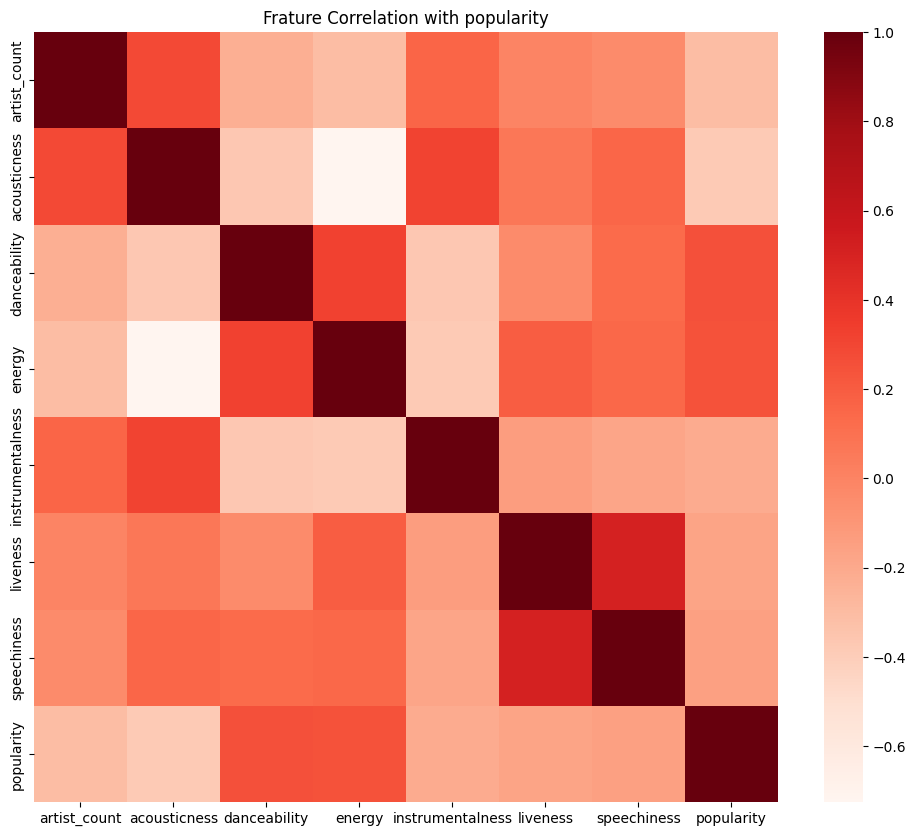

In [6]:
import seaborn as sns

plt.figure(figsize=(12,10))
numeric_data=data[lst1+lst2].select_dtypes(include=['number'])
corr=numeric_data.corr()
sns.heatmap(corr,cmap='Reds',fmt=".5f")
plt.title('Frature Correlation with popularity')
plt.show

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()


In [9]:
model.fit(x_train,y_train)

LinearRegression()

In [10]:
print(model.coef_)
print(model.intercept_)

[[-1.50545641e-04  7.25664252e-02  1.49553756e+00  8.58554609e-01
  -1.58539149e+00 -2.52728084e+00 -4.17160644e+00 -2.98327447e+01
   1.06851986e+01 -1.49393788e+01 -4.50541440e+00 -3.50436325e+01
   1.51012242e+01 -8.77690366e+00 -1.38302600e+01  6.26262065e+00
   1.75425855e+01 -1.07877335e+00  1.03459788e+01  1.90463257e+01
   1.51291953e+01  1.81664632e+00 -2.66685849e+01 -2.51145198e+01
   2.69578542e+01  1.28136761e+01  2.11187605e+01 -4.01979111e+00
  -1.90815228e+00  1.98921004e+01 -1.08404793e+01  7.39264366e+00
  -3.95546660e+00 -3.59070850e+00]]
[39.06059183]


In [11]:
y_pred=model.predict(x_test)
y_pred=pd.DataFrame(y_pred,columns=['Predicted Popularity'])


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,root_mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
print(mse)

92.419136592356


In [13]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

7.27567558581769


In [14]:
rmse=root_mean_squared_error(y_test,y_pred)
print(rmse)

9.613487223289788


In [15]:
r2_score=r2_score(y_test,y_pred)
print(r2_score)


0.7224330659325107


In [16]:
import pandas as pd


new_songs = pd.DataFrame([
    {
        'artist_name': 'Joseph Williams',
        'genre': 'movie',
        'acousticness': 0.952,
        'danceability': 0.663,
        'energy': 0.131,
        'instrumentalness': 0.0,
        'liveness': 0.103,
        'speechiness': 0.0362,
        'valence': 0.368,
        'loudness': -13.879,
        'tempo': 99.488,
        'duration_ms': 170267
    },
    {
        'artist_name': 'Praga',
        'genre': 'Indie',
        'acousticness': 0.6,
        'danceability': 0.5,
        'energy': 0.6,
        'instrumentalness': 0.0,
        'liveness': 0.2,
        'speechiness': 0.04,
        'valence': 0.7,
        'loudness': -6.0,
        'tempo': 100,
        'duration_ms': 180000
    }
])

print(new_songs)


       artist_name  genre  acousticness  danceability  energy  \
0  Joseph Williams  movie         0.952         0.663   0.131   
1            Praga  Indie         0.600         0.500   0.600   

   instrumentalness  liveness  speechiness  valence  loudness    tempo  \
0               0.0     0.103       0.0362    0.368   -13.879   99.488   
1               0.0     0.200       0.0400    0.700    -6.000  100.000   

   duration_ms  
0       170267  
1       180000  


In [17]:
for i, row in new_songs.iterrows():
    if row['artist_name'] in data['artist_name'].values:
        new_songs.at[i,'artist_count'] = data[data['artist_name']==row['artist_name']]['artist_name'].count()
    else:
        new_songs.at[i,'artist_count'] = 1

new_genre_encoded = pd.get_dummies(new_songs['genre'], prefix='genre')
new_genre_encoded.columns = [f'{col}_{i}' if col in new_genre_encoded.columns[:i].tolist() else col for i, col in enumerate(new_genre_encoded.columns)]


numeric_features = ['artist_count','acousticness','danceability','energy','instrumentalness',
                    'liveness','speechiness','valence','loudness','tempo','duration_ms']


new_x = pd.concat([new_songs[numeric_features], new_genre_encoded], axis=1)

new_x = new_x.reindex(columns=x.columns, fill_value=0)


print(new_x)

   artist_count  acousticness  danceability  energy  instrumentalness  \
0          39.0         0.952         0.663   0.131               0.0   
1           1.0         0.600         0.500   0.600               0.0   

   liveness  speechiness  genre_A Capella  genre_Alternative  genre_Anime  \
0     0.103       0.0362                0                  0            0   
1     0.200       0.0400                0                  0            0   

   ...  genre_Pop  genre_R&B  genre_Rap  genre_Reggae  genre_Reggaeton  \
0  ...          0          0          0             0                0   
1  ...          0          0          0             0                0   

   genre_Rock  genre_Ska  genre_Soul  genre_Soundtrack  genre_World  
0           0          0           0                 0            0  
1           0          0           0                 0            0  

[2 rows x 34 columns]


In [18]:
y_pred_new = model.predict(new_x)

y_pred_new = pd.DataFrame(y_pred_new, columns=['Predicted Popularity'])
print(y_pred_new)


   Predicted Popularity
0             39.816494
1             54.823758


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")


MSE: 92.419136592356
RMSE: 9.613487223289788
MAE: 7.27567558581769
R² Score: 0.7224330659325107


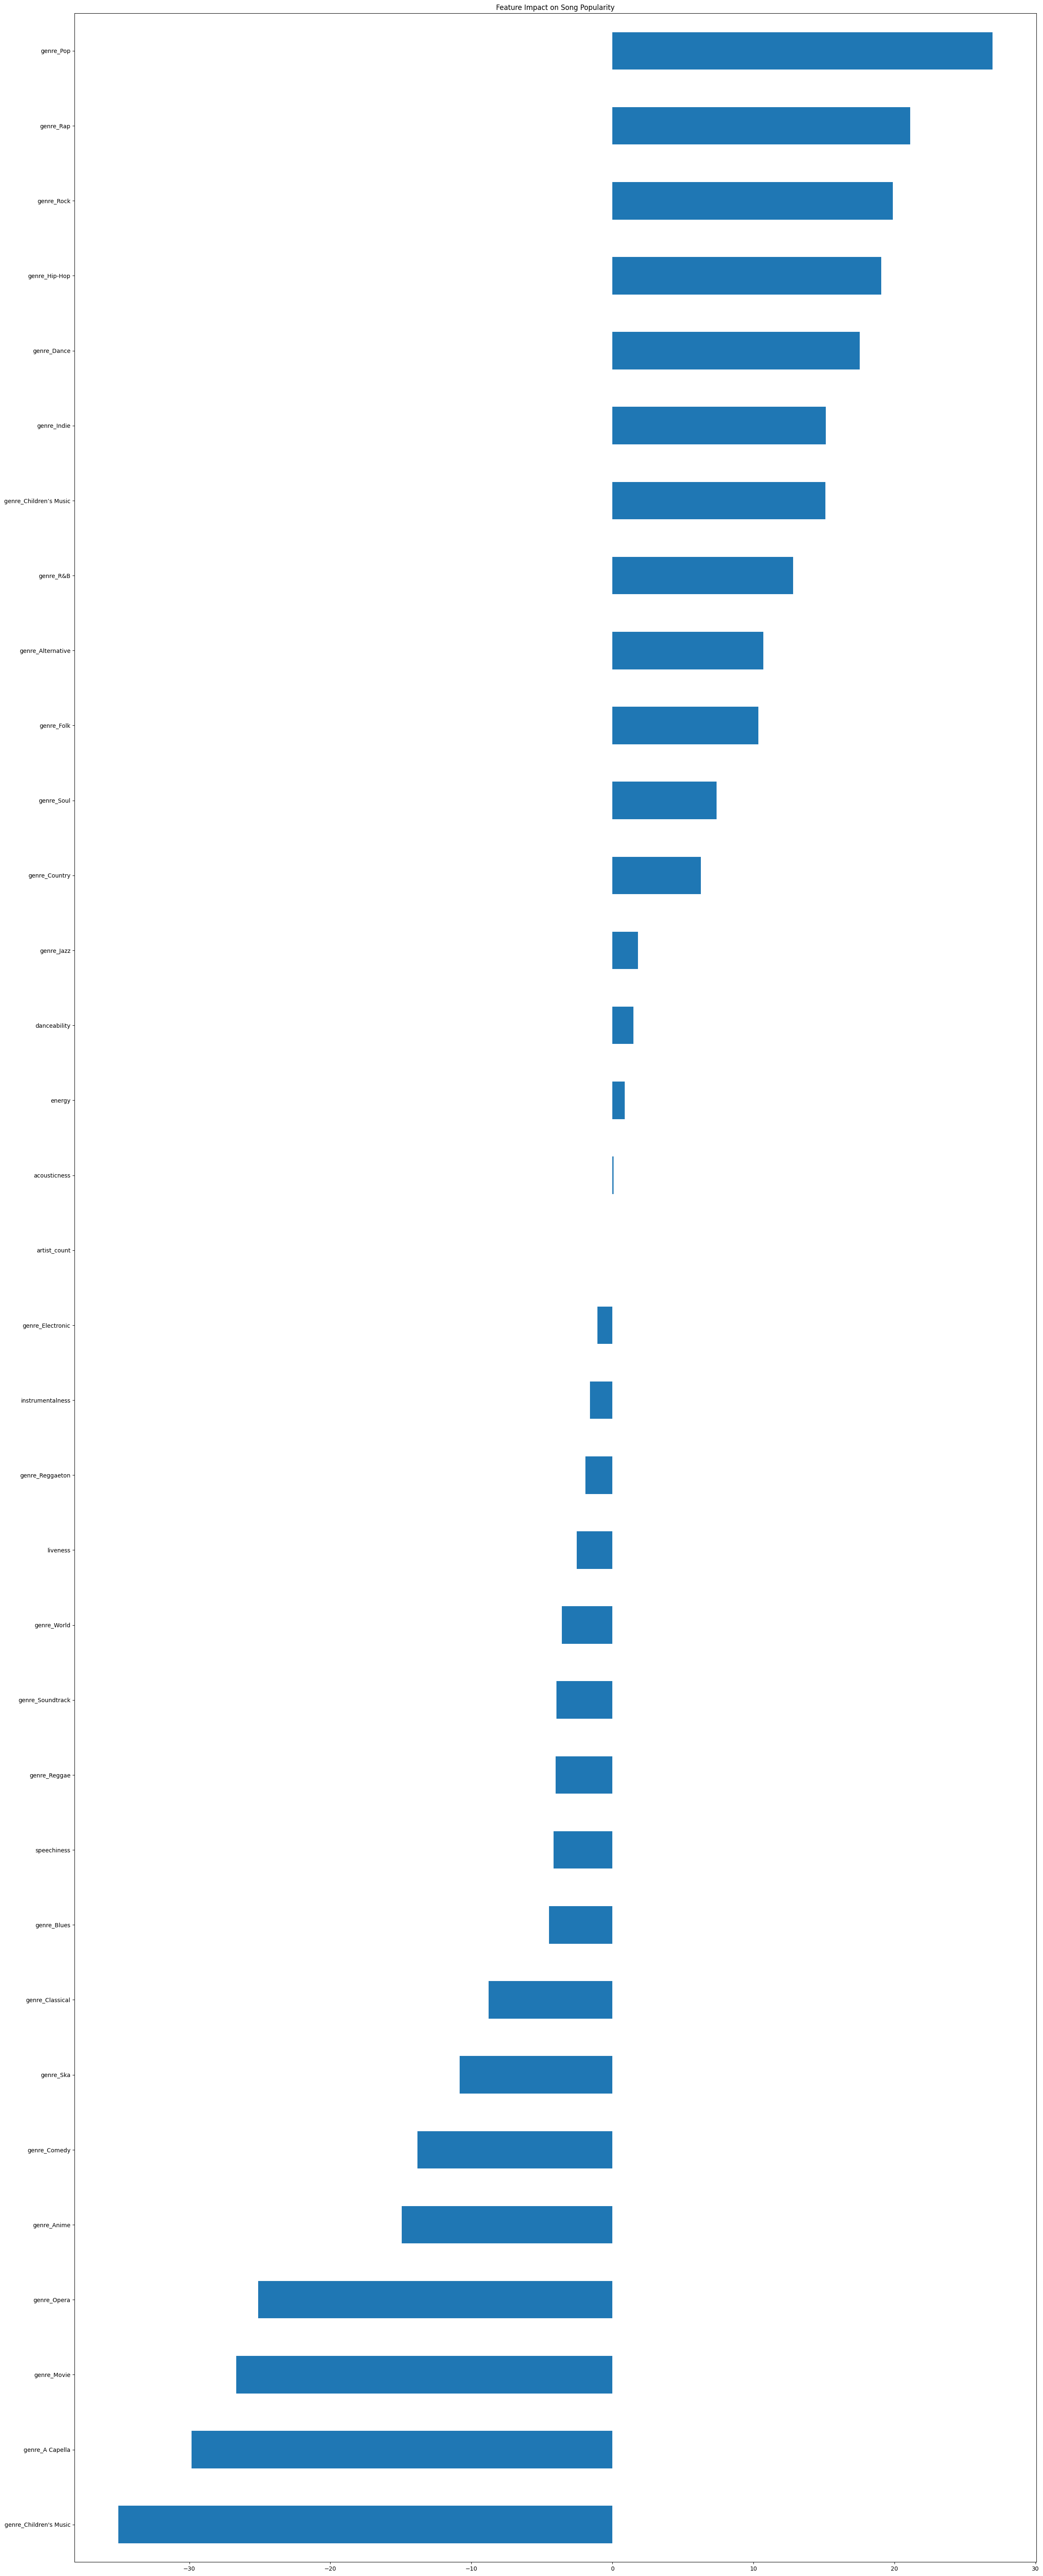

In [20]:

coefficients = pd.Series(model.coef_[0], index=x.columns)
coefficients.sort_values().plot(kind='barh', figsize=(30,80))
plt.title("Feature Impact on Song Popularity")
plt.show()
